In [97]:
# TODO export to xlx and evaluate samples
# TODO import xlx
# TODO Calculate scores for each 

# TODO remove duplicates

In [98]:
import pandas as pd

# Read the text file into a pandas DataFrame
df_CX = pd.read_csv('COREX OUTPUT DESC Trial CX\labels.txt', header=None, names=['Doc','Enviromental','Social','Economic','Health'])

# Add "No Theme" and set it to 1 where no other theme is present
themes_list = ['Enviromental','Social','Economic','Health']
no_theme = df_CX[themes_list].eq(0).all(axis=1)
df_CX['No Theme'] = 0
df_CX.loc[no_theme, 'No Theme'] = 1
themes_list.append('No Theme')

# Getting a random number of size 15 from each theme
list_samples_CX = pd.concat([df_CX[df_CX[theme] == 1].sample(n=min(15, (df_CX[theme] == 1).sum()), random_state=999) for theme in themes_list])
list_samples_CX = list_samples_CX["Doc"].to_list()
#list_samples_CX.sort()
print(list_samples_CX)


[5708, 9911, 4530, 2911, 2307, 9889, 3815, 4004, 4911, 3047, 3372, 608, 5859, 8865, 4750, 8287, 5118, 5462, 3540, 1283, 4957, 2185, 6899, 7536, 8519, 4371, 9167, 7419, 7861, 6462, 3987, 3543, 9405, 2941, 6019, 5261, 4250, 8765, 103, 5938, 9728, 5287, 597, 7699, 153, 5060, 4522, 4661, 4291, 9092, 2311, 1447, 5112, 8936, 7034, 1164, 1351, 1461, 6855, 5665, 660, 1046, 9210, 5565, 1763, 6344, 5822, 6437, 3520, 8967, 1307, 9100, 1222, 6115, 8410]


In [99]:
# GLDA getting lables

# Read the text file into pandas DataFrame
df_GLDA = pd.read_csv('GLDA OUTPUT DESC Trial.txt', sep='\t', header=None, names=['Doc','Enviromental','Social','Economic','Health'])

# Add "No Theme" and set it to 1 where no other theme is present
themes_list = ['Enviromental','Social','Economic','Health']
no_theme = df_GLDA[themes_list].eq(0).all(axis=1)
df_GLDA['No Theme'] = 0
df_GLDA.loc[no_theme, 'No Theme'] = 1
themes_list.append('No Theme')

# Getting a random number of size 15 from each theme
list_samples_GLDA = pd.concat([df_GLDA[df_GLDA[theme] == 1].sample(n=min(15, (df_GLDA[theme] == 1).sum()), random_state=888) for theme in themes_list])
list_samples_GLDA = list_samples_GLDA["Doc"].to_list()
#list_samples_GLDA.sort()
print(list_samples_GLDA)


[4175, 4471, 2099, 690, 1526, 2626, 8281, 9894, 15, 54, 75, 4655, 9715, 6376, 1789, 5632, 5601, 2243, 3527, 3521, 3458, 9380, 8329, 6778, 8156, 9395, 3200, 3381, 4251, 4697, 3315, 3041, 6866, 5074, 3252, 9864, 5316, 4978, 959, 7335, 3741, 2740, 1373, 3365, 2376, 1594, 7383, 4520, 9321, 2978, 2110, 5250, 1219, 8371, 8093, 5998, 6402, 5514, 4498, 8171, 9494, 9694, 5254, 5749, 4114, 3718, 185, 893, 4702, 8947, 1667, 2899, 2379, 8919, 913]


In [100]:
# Getting list of lables for each model (based on those random numbers)

# Combine random sample list of both models
random_samples_list = list_samples_CX + list_samples_GLDA
#random_samples_list.sort()
random_samples_list


# Check for duplicates
from collections import Counter
#duplicates = [item for item, count in Counter(random_samples_list).items() if count > 1]
#print("Duplicates found:", duplicates) if duplicates else print("No duplicates found")

# Take lable samples from each of the models
# Getting Corex labels 
df_samples_CX = df_CX[df_CX['Doc'].isin(random_samples_list)]
df_samples_CX

# Getting GLDA labels 
df_samples_GLDA = df_GLDA[df_GLDA['Doc'].isin(random_samples_list)]
df_samples_GLDA



,Doc,Enviromental,Social,Economic,Health,No Theme
15,15,1,0,0,0,0
54,54,1,0,0,0,0
75,75,1,0,0,0,0
103,103,1,0,0,0,0
153,153,0,0,0,1,0
...,...,...,...,...,...,...
9728,9728,1,0,0,0,0
9864,9864,0,0,1,0,0
9889,9889,1,0,0,0,0
9894,9894,1,1,0,0,0


In [101]:
all_labels_sample = pd.merge(df_samples_CX, df_samples_GLDA, how='outer', on='Doc', suffixes=('_CX', '_GLDA'))
all_labels_sample

,Doc,Enviromental_CX,Social_CX,Economic_CX,Health_CX,No Theme_CX,Enviromental_GLDA,Social_GLDA,Economic_GLDA,Health_GLDA,No Theme_GLDA
0,15,0,1,1,0,0,1,0,0,0,0
1,54,0,0,1,0,0,1,0,0,0,0
2,75,0,1,1,0,0,1,0,0,0,0
3,103,0,0,1,0,0,1,0,0,0,0
4,153,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
145,9728,0,0,1,0,0,1,0,0,0,0
146,9864,0,0,0,0,1,0,0,1,0,0
147,9889,1,0,0,1,0,1,0,0,0,0
148,9894,0,0,0,0,1,1,1,0,0,0


In [102]:
# Get description file
df_desc = pd.read_csv('df for evaluation DESC Trial.csv')

# Selecting only the columns that are required for analysis
required_columns = ["description_str","asin", "num_words_description","clean_description"]#["reviewText","num_words_reviews", "clean_reviews"]
df_desc = df_desc[required_columns]
df_desc

,description_str,asin,num_words_description,clean_description
0,Loud 'N Clear Personal Sound Amplifier allows ...,6546546450,37,loud clear personal sound amplifier allows tur...
1,No7 Stay Perfect Foundation now stays perfect ...,7250468162,96,no stay perfect foundation stay perfect longer...
2,Lacto Calamine Skin Balance Daily Nourishing L...,7414204790,14,calamine skin balance daily nourishing lotion ...
3,"According to the legend, in 1613, two brothers...",8279996397,77,according legend brother native origin black b...
4,Novi prevod proslavljene knjige Zadruga objavl...,8637910351,53,nov period knife priv colour martini kay divot...
...,...,...,...,...
9935,Theres no finer way for a chap to get ready fo...,B01HIH2QTU,21,no finer way chap ready close gentleman hardwa...
9936,Move over soap on a rope! This heavy-duty Bric...,B01HIHLFOC,18,soap rope heavy duty brick soap toughest gent ...
9937,Eau de parfum spray vial mini design house: yv...,B01HIPOQ2M,21,eau de perfume spray vial mini design house yv...
9938,Pokemon Plush 9.2 Inch / 23cm Gengar Doll Stuf...,B01HIUEEHO,15,pokemon plush inch pm gear doll stuffed animal...


In [103]:
# Merge labels from both models and the descriptions
final_samples = pd.merge(all_labels_sample, df_desc, right_index=True, left_on='Doc')

# Sort by order of sampling 
final_samples = final_samples.sort_values(by = 'Doc', key = lambda col: col.map(lambda x: random_samples_list.index(x)))
final_samples


,Doc,Enviromental_CX,Social_CX,Economic_CX,Health_CX,No Theme_CX,Enviromental_GLDA,Social_GLDA,Economic_GLDA,Health_GLDA,No Theme_GLDA,description_str,asin,num_words_description,clean_description
95,5708,1,1,1,1,0,0,0,1,0,0,Botanical Name: Satureja Montana Cultivation M...,B00LJ7JVM6,208,botanical montana cultivation method wild craf...
149,9911,1,0,0,0,0,0,0,0,0,1,Feel the heat. Bare on the beach. The sun dipp...,B01HE4QV52,47,feel heat bare beach sun dipping turquoise wat...
71,4530,1,0,0,1,0,0,0,1,1,0,Elegantly designed to delight your eyes while ...,B00FZP1298,61,elegantly designed delight eye cleansing quenc...
39,2911,1,0,0,1,0,0,0,0,1,0,The Dark circle concealer diminishes the appea...,B007BDFWKM,25,dark circle concealer diminishes appearance im...
32,2307,1,1,0,1,0,0,0,0,1,0,SpaRitual Handprint Hand Serum delivers a slow...,B004U6O0XS,70,spiritual handspring hand serum delivers slow ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,1667,0,0,0,0,1,0,0,0,0,1,Is your plunging V-neck revealing a little too...,B0026K8JBY,71,plunging neck revealing little office no probl...
38,2899,0,0,1,1,0,0,0,0,0,1,Soap & Glory's bestselling extreme plumping li...,B0079HOHD8,92,soap glory bestselling extreme plumping lip gl...
35,2379,0,0,0,0,1,0,0,0,0,1,The NEWEST Permanent Friend Holder System. Eas...,B004ZCBELI,22,newest permanent friend holder system easy use...
130,8919,0,0,0,0,1,0,0,0,0,1,Per TSUBAKI volume touch Shampoo & Conditioner...,B01BK6M1HW,20,tsunami volume touch shampoo conditioner jumbo...


In [104]:
# Export to xlsx file for labeling
final_samples.to_excel("FOR LABELING.xlsx", index=False , sheet_name="Samples")



In [106]:
# Import xlsx file with labels from all experts
labeled_samples = pd.read_excel("LABELED SAMPLES.xlsx", sheet_name="Samples")
labeled_samples

,Doc,Enviromental_CX,Social_CX,Economic_CX,Health_CX,No Theme_CX,Enviromental_GLDA,Social_GLDA,Economic_GLDA,Health_GLDA,No Theme_GLDA,description_str,asin,num_words_description,clean_description,Enviromental_Expert,Social_Expert,Economic_Expert,Health_Expert,No Theme_Expert
0,5708,1,1,1,1,0,0,0,1,0,0,Botanical Name: Satureja Montana Cultivation M...,B00LJ7JVM6,208,botanical montana cultivation method wild craf...,1,0,0,0,0
1,9911,1,0,0,0,0,0,0,0,0,1,Feel the heat. Bare on the beach. The sun dipp...,B01HE4QV52,47,feel heat bare beach sun dipping turquoise wat...,0,1,0,0,0
2,4530,1,0,0,1,0,0,0,1,1,0,Elegantly designed to delight your eyes while ...,B00FZP1298,61,elegantly designed delight eye cleansing quenc...,0,0,1,0,0
3,2911,1,0,0,1,0,0,0,0,1,0,The Dark circle concealer diminishes the appea...,B007BDFWKM,25,dark circle concealer diminishes appearance im...,0,0,0,1,0
4,2307,1,1,0,1,0,0,0,0,1,0,SpaRitual Handprint Hand Serum delivers a slow...,B004U6O0XS,70,spiritual handspring hand serum delivers slow ...,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1667,0,0,0,0,1,0,0,0,0,1,Is your plunging V-neck revealing a little too...,B0026K8JBY,71,plunging neck revealing little office no probl...,1,0,0,1,0
146,2899,0,0,1,1,0,0,0,0,0,1,Soap & Glory's bestselling extreme plumping li...,B0079HOHD8,92,soap glory bestselling extreme plumping lip gl...,0,0,0,1,0
147,2379,0,0,0,0,1,0,0,0,0,1,The NEWEST Permanent Friend Holder System. Eas...,B004ZCBELI,22,newest permanent friend holder system easy use...,0,0,0,1,0
148,8919,0,0,0,0,1,0,0,0,0,1,Per TSUBAKI volume touch Shampoo & Conditioner...,B01BK6M1HW,20,tsunami volume touch shampoo conditioner jumbo...,1,0,0,1,0


In [145]:
# Evaluation TODO add hammming loss

from sklearn import metrics
from sklearn.metrics import classification_report


y_true_all_cx = labeled_samples[['Enviromental_Expert','Social_Expert','Economic_Expert','Health_Expert','No Theme_Expert']]
y_pred_all_cx = labeled_samples[['Enviromental_CX','Social_CX','Economic_CX','Health_CX','No Theme_CX']]
print(classification_report(y_true_all_cx,y_pred_all_cx, target_names=['Enviromental','Social','Economic','Health','No Theme']))
print("------------------------------------")
#metrics.accuracy_score(y_true_all,y_pred_all) #actual row matching
#metrics.hamming_loss(y_true_all,y_pred_all) #actual row matching ?

expert_labels = ['Enviromental_Expert','Social_Expert','Economic_Expert','Health_Expert','No Theme_Expert']

cx_labels = ['Enviromental_CX','Social_CX','Economic_CX','Health_CX','No Theme_CX']
glda_labels = ['Enviromental_GLDA','Social_GLDA','Economic_GLDA','Health_GLDA','No Theme_GLDA']

# Corex accuracy calculation
for expert, cx in zip(expert_labels, cx_labels):
    # expert #cx
    y_true = labeled_samples[expert]
    y_pred = labeled_samples[cx]
    accuracy = metrics.accuracy_score(y_true,y_pred)
    print("COREX Accuracy,",expert.replace("_Expert",""), accuracy)

print("-------------------------------------------------")

# GLDA accuracy calculation
for expert, glda in zip(expert_labels, glda_labels):
    # expert #glda
    y_true = labeled_samples[expert]
    y_pred = labeled_samples[glda]
    accuracy = metrics.accuracy_score(y_true,y_pred)
    print("GLDA Accuracy ",expert.replace("_Expert",""), accuracy)


              precision    recall  f1-score   support

Enviromental       0.40      0.32      0.36        50
      Social       0.17      0.29      0.22        24
    Economic       0.12      0.29      0.17        24
      Health       0.33      0.40      0.36        53
    No Theme       0.11      0.20      0.14        25

   micro avg       0.23      0.32      0.27       176
   macro avg       0.23      0.30      0.25       176
weighted avg       0.27      0.32      0.28       176
 samples avg       0.23      0.32      0.25       176

COREX Accuracy, Enviromental 0.6133333333333333
COREX Accuracy, Social 0.66
COREX Accuracy, Economic 0.5466666666666666
COREX Accuracy, Health 0.5066666666666667
COREX Accuracy, No Theme 0.6066666666666667
-------------------------------------------------
GLDA Accuracy  Enviromental 0.58
GLDA Accuracy  Social 0.72
GLDA Accuracy  Economic 0.7266666666666667
GLDA Accuracy  Health 0.5666666666666667
GLDA Accuracy  No Theme 0.72


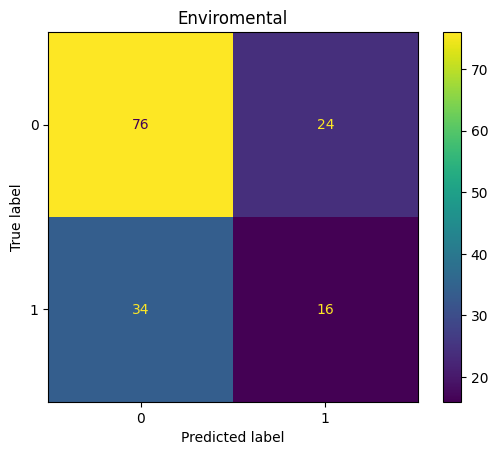

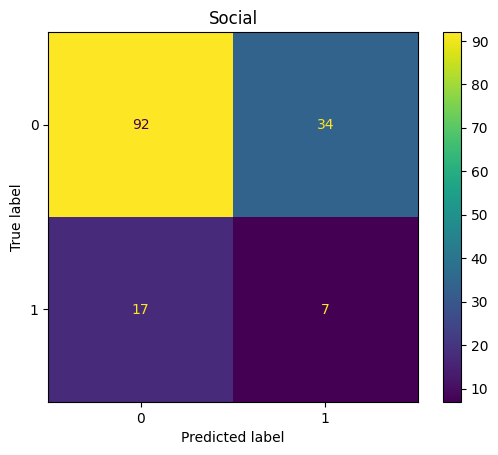

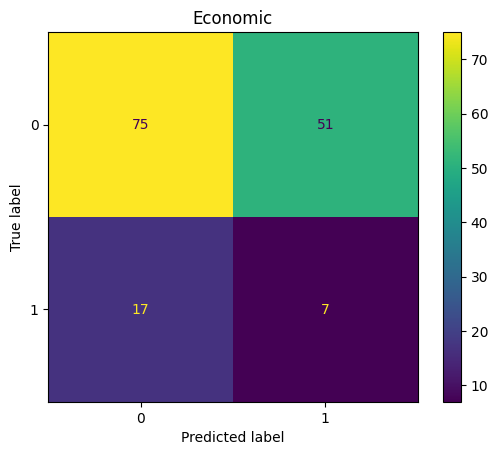

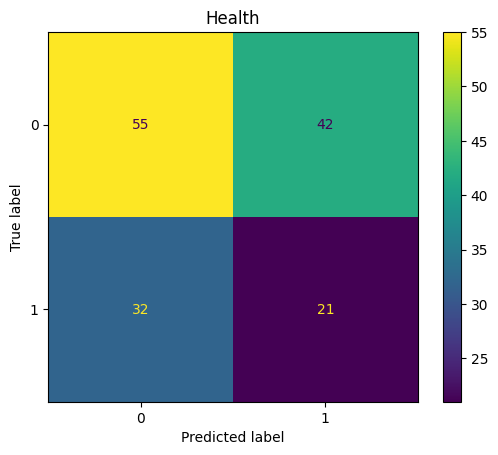

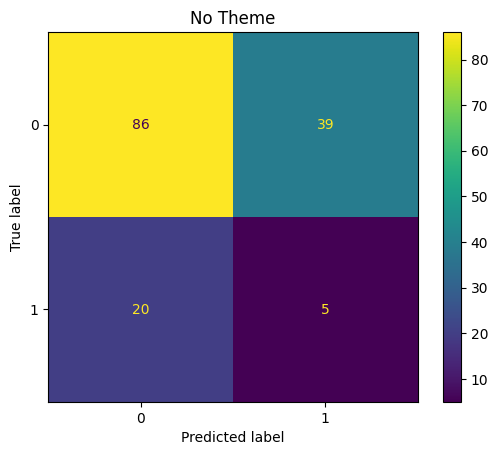

In [149]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

expert_labels = ['Enviromental_Expert','Social_Expert','Economic_Expert','Health_Expert','No Theme_Expert']

cx_labels = ['Enviromental_CX','Social_CX','Economic_CX','Health_CX','No Theme_CX']
glda_labels = ['Enviromental_GLDA','Social_GLDA','Economic_GLDA','Health_GLDA','No Theme_GLDA']

# Corex accuracy calculation
for expert, cx in zip(expert_labels, cx_labels):
    y_true = labeled_samples[expert]
    y_pred = labeled_samples[cx]
    cm = confusion_matrix(y_true, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()
    plt.title(expert.replace("_Expert",""))

82941


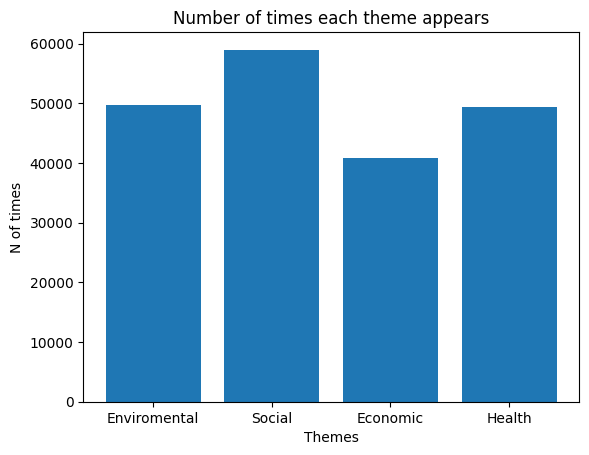

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Read labels 
data = np.loadtxt('COREX OUTPUT Descriptions\labels.txt', delimiter=',')

# Extract all columns but not the first one
columns = data[:, 1:]

# Summation of each column to add up how often each theme appears
sum_themes = np.sum(columns, axis=0)

# Identify and sum any rows without 1s in each column by checking if the sum of the whole row is 0
rows_without_theme = np.sum(columns, axis=1) == 0

# Find how many don't have a theme
num_rows_without_theme = np.sum(rows_without_theme)
print(num_rows_without_theme)

# Add new column represting no themes with 1 and 0 for having a theme
data = np.column_stack((data, rows_without_theme.astype(int)))

# Create new labels text file with addition of the new "no themes" column as int
np.savetxt( 'new_labels_COREX.txt', data, delimiter=',', fmt='%d')


# Display the results
labels = ['Enviromental', 'Social', 'Economic', 'Health']
plt.bar(labels, sum_themes)
plt.xlabel('Themes')
plt.ylabel('N of times')
plt.title('Number of times each theme appears')
plt.show() 